In [24]:
#import functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import numpy as np
import math


#for in notebook graphic exploration
%matplotlib inline

In [25]:
#read in the data
df = pd.read_csv('1000CharSimulated20seed.csv',index_col=0)

In [26]:
#creates a new row where I take the average of all abilities
df['ability_mean'] = df.loc[:,"strength":"charisma"].mean(axis=1)

#creates a new row where I take the average of all modifiers
df['mod_mean'] = df.loc[:,"str mod":"char mod"].mean(axis=1)

In [31]:
df.sample(10)

,roll_type,strength,dexterity,constitution,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_mean,mod_mean
2715,Colville,14,13,13,16,10,16,2,1,1,3,0,3,13.666667,1.666667
1983,4D6DropLow,12,7,16,17,12,12,1,-2,3,3,1,1,12.666667,1.166667
1187,4D6DropLow,17,16,12,11,12,10,3,3,1,0,1,0,13.000000,1.333333
2404,Colville,16,10,13,16,12,13,3,0,1,3,1,1,13.333333,1.500000
1808,4D6DropLow,15,13,10,16,11,11,2,1,0,3,0,0,12.666667,1.000000
1712,4D6DropLow,8,9,17,15,14,11,-1,-1,3,2,2,0,12.333333,0.833333
2339,Colville,8,14,16,11,16,15,-1,2,3,0,3,2,13.333333,1.500000
2544,Colville,16,10,10,12,13,15,3,0,0,1,1,2,12.666667,1.166667
125,3D6,10,7,8,11,12,9,0,-2,-1,0,1,-1,9.500000,-0.500000
749,3D6,4,15,10,9,13,14,-3,2,0,-1,1,2,10.833333,0.166667


In [35]:
Colville = df[df['roll_type']=="Colville"]['ability_mean']
FourD6Drop = df[df['roll_type']=="4D6DropLow"]['ability_mean']
ThreeD6 = df[df['roll_type']=="3D6"]['ability_mean']

In [36]:
#Null Hypothesis: No difference between 3D6 and Colville
#Alt Hypothesis: Difference between 3D6 and Colville

stats.ttest_ind(a = Colville,
              b = ThreeD6,
              equal_var = False)


Ttest_indResult(statistic=55.041476067887849, pvalue=0.0)

In [37]:
stats.ttest_ind(a = Colville,
              b = FourD6Drop,
              equal_var = False)

Ttest_indResult(statistic=17.207143840000047, pvalue=9.0015771128182441e-62)

Colville's method gives us statistically significant better characters 

Now let's do some exploration in Seaborn

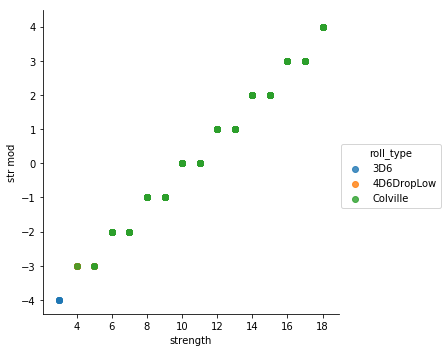

In [52]:
sns.lmplot(data = df, 
           x = 'strength',
           y = 'str mod',
           hue = 'roll_type',
           fit_reg = False)

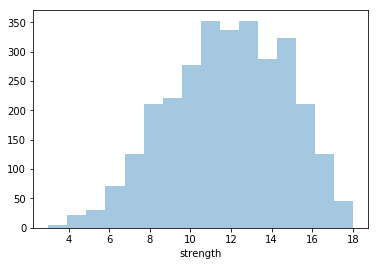

In [47]:
sns.distplot(df['strength'],kde = False, bins = 16)

In [49]:
sns.distplot(df['strength'],kde = False, bins = 16, hue = 'roll_type')

TypeError: distplot() got an unexpected keyword argument 'hue'

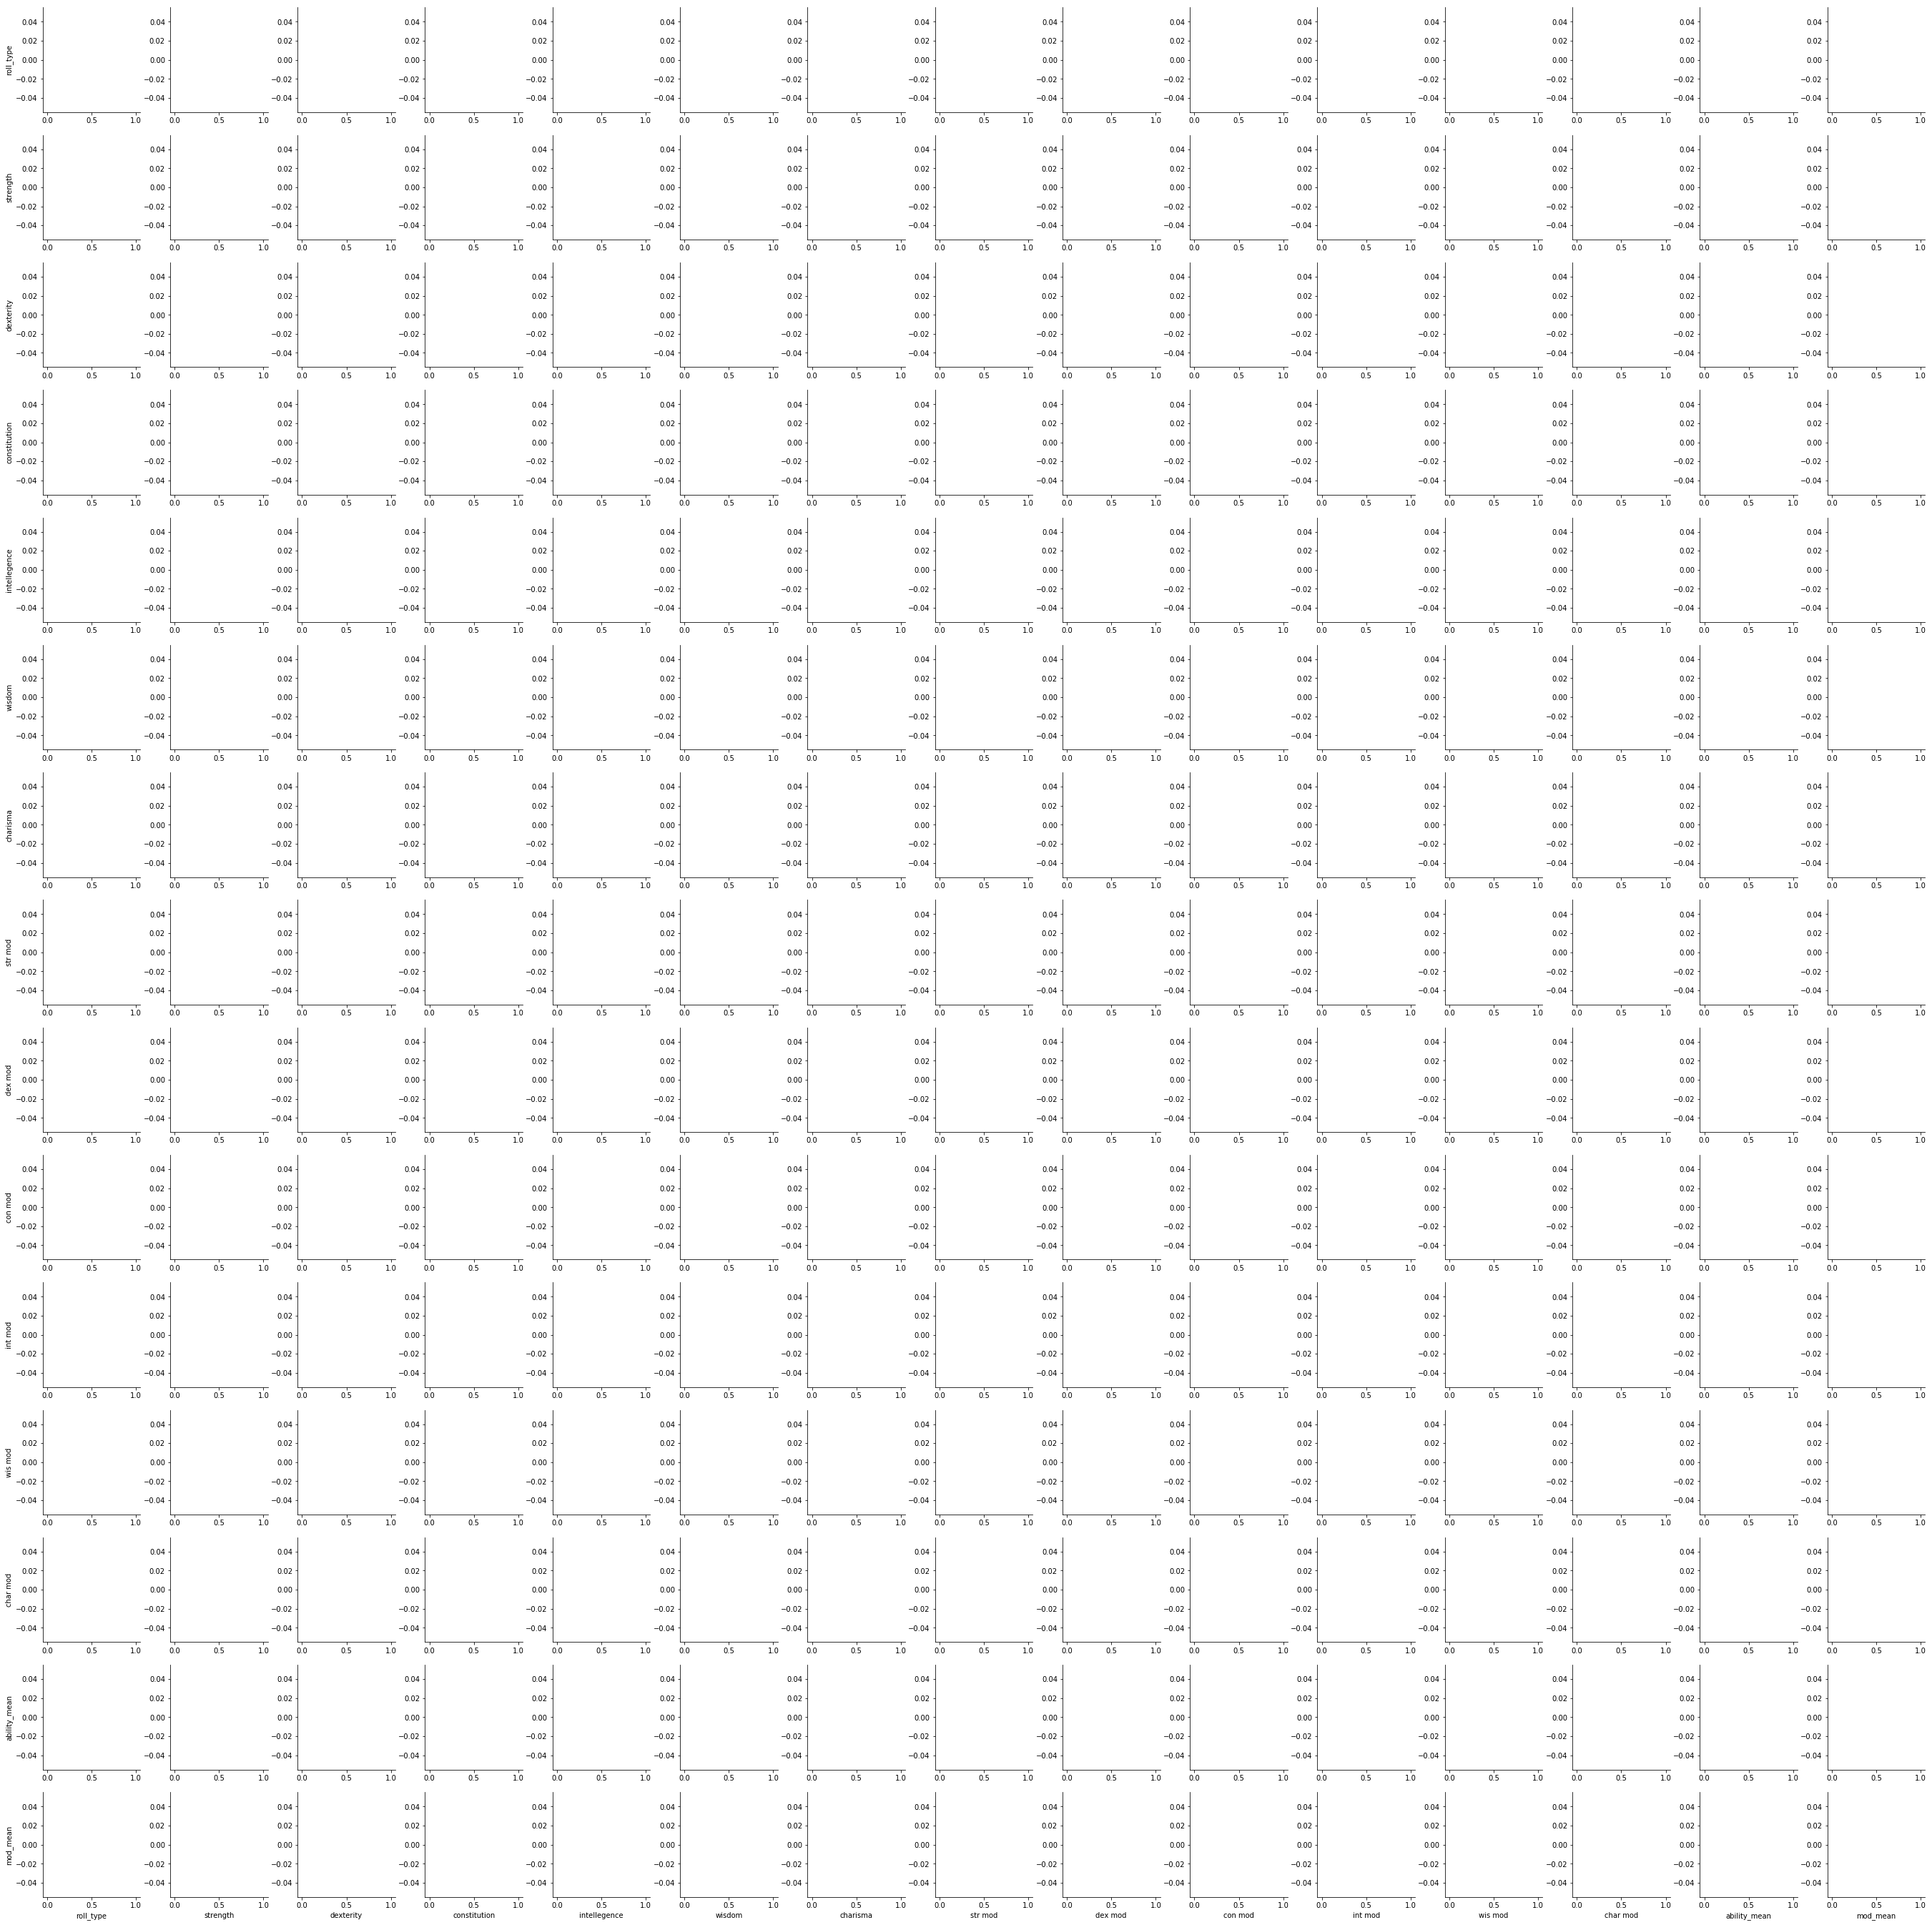

In [53]:
sns.pairplot(df.loc["strength":"dexterity"])